# Homework Assignment  6

**Question 1:** Construct a sentiment classifier using 80% of the reviews in the [Amazon Fine Food Reviews dataset](https://www.kaggle.com/snap/amazon-fine-food-reviews).
The classifier needs to predict if a product got a one-star or a five-star review. 
Evaluate the classifier using the rest of the data (30pt). 


In [ ]:
!pip install turicreate
!pip install kaggle 
!pip install gensim
!pip install pyLDAvis
!pip install spaCy
!pip install afinn

In [ ]:
#setting up Kaggle & TuriCreate package s
import json
import os

!mkdir /root/.kaggle/
# Installing the Kaggle package

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"","key":""}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [ ]:
import kaggle
# Creating a dataset directory
!mkdir ./datasets
!mkdir ./datasets/amazon-fine-food-reviews

# download the dataset from Kaggle and unzip it
!kaggle datasets download snap/amazon-fine-food-reviews -f Reviews.csv -p ./datasets/amazon-fine-food-reviews
!unzip ./datasets/amazon-fine-food-reviews/*.zip  -d ./datasets/amazon-fine-food-reviews

mkdir: cannot create directory ‘./datasets’: File exists
mkdir: cannot create directory ‘./datasets/amazon-fine-food-reviews’: File exists
Reviews.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./datasets/amazon-fine-food-reviews/Reviews.csv.zip
replace ./datasets/amazon-fine-food-reviews/Reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import turicreate as tc
sf = tc.SFrame.read_csv("./datasets/amazon-fine-food-reviews/Reviews.csv")

Unexpected characters after last column. "B000GW46D4"
Parse failed at token ending at: 
	myself that tastes much better than this."
35360,B000GW46D4,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 35359
	1: B000GW46D4
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: Very dry,  ... rumbly :",
	9: to the poi ... is."
35360

Unexpected characters after last column. "one of only a very few"
Parse failed at token ending at: 
	hile. This is a very rare hot sauce, one of only a very few,^ where the actual chile is the major ingredient.
Successfully parsed 10 tokens: 
	0: 74275
	1: B005B3HKPO
	2: A3OC6M21K4UAQ
	3: tw
	4: 2
	5: 5
	6: 2
	7: 1328486400
	8: whats with ... is smell??
	9: ummm can s ... mmended!.,

Unexpected characters after last column. "B000PMJLJO"
Parse failed at token ending at: 
	myself that tastes much better than this."
88623,B000PMJLJO,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 88622
	1: B000PMJLJO
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: Very dry,  ... rumbly :",
	9: to the poi ... is."
88623

Read 100 lines. Lines per second: 63.8539

3 lines failed to parse correctly

Finished parsing file /content/datasets/amazon-fine-food-reviews/Reviews.csv

Parsing completed. Parsed 100 lines in 1.56673 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,int,int,int,int,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Unexpected characters after last column. "B000GW46D4"
Parse failed at token ending at: 
	myself that tastes much better than this."
35360,B000GW46D4,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 35359
	1: B000GW46D4
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... is."
35360

Unexpected characters after last column. "one of only a very few"
Parse failed at token ending at: 
	hile. This is a very rare hot sauce, one of only a very few,^ where the actual chile is the major ingredient.
Successfully parsed 10 tokens: 
	0: 74275
	1: B005B3HKPO
	2: A3OC6M21K4UAQ
	3: tw
	4: 2
	5: 5
	6: 2
	7: 1328486400
	8: whats with ... is smell??
	9: "ummm can  ...  hot sauce

Unexpected characters after last column. "B000PMJLJO"
Parse failed at token ending at: 
	myself that tastes much better than this."
88623,B000PMJLJO,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 88622
	1: B000PMJLJO
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... is."
88623

Unexpected characters after last column. "but that awful after taste has no place in my afternoons.  Fog Chaser is flavorful but smooth. If you have had difficulty finding a good coffee for the new machines"
Parse failed at token ending at: 
	e had difficulty finding a good coffee for the new machines,^ do give this one a try."
181216,B007Y59HVM,#oc-
Successfully parsed 10 tokens: 
	0: 181213
	1: B007Y59HVM
	2: #oc-R3W5DW4JKJT228
	3: Mamaw
	4: 0
	5: 2
	6: 1
	7: 1346112000
	8: Disappointed
	9: "I regret  ... he morning

Unexpected characters after last column. "0"
Parse failed at token ending at: 
	 />\"
190510,B0012UEHFQ,A2788LGTSGCFA6,"Mom of 3 ""sue""",0,^0,5,1329436800,She Loves Them!,I have a crazy do
Successfully parsed 10 tokens: 
	0: 190509
	1: B0012UEHFQ
	2: A3CR0UBHFX0NE7
	3: Sharee Lee Peterson
	4: 0
	5: 0
	6: 1
	7: 1330300800
	8: Poor Substitute
	9: I had prev ... of 3 "sue"

Unexpected characters after last column. "B000GW46DE"
Parse failed at token ending at: 
	yself that tastes much better than this."
201283,B000GW46DE,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 201282
	1: B000GW46DE
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... s."
201283

Read 166023 lines. Lines per second: 31490.5

Unexpected characters after last column. "B000PMC7GI"
Parse failed at token ending at: 
	yself that tastes much better than this."
353089,B000PMC7GI,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 353088
	1: B000PMC7GI
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... s."
353089

Unexpected characters after last column. "give it a try.  After drinking half of a bottle"
Parse failed at token ending at: 
	ou haven't, give it a try.  After drinking half of a bottle,^ you will know it's good stuff."
434576,B001SB1B
Successfully parsed 10 tokens: 
	0: 434574
	1: B002DHMX3A
	2: A2XNJJ9TF70P4J
	3: Angie
	4: 1
	5: 1
	6: 1
	7: 1307232000
	8: How did th ... s this up?
	9: "The cerea ... ou haven't

8 lines failed to parse correctly

Finished parsing file /content/datasets/amazon-fine-food-reviews/Reviews.csv

Parsing completed. Parsed 260995 lines in 8.15511 secs.

In [ ]:
sf

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""NataliaCorres"" ...",1,1,4
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M.Wassir"" ...",0,0,5
6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4
7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5
9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5
10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5


In [ ]:
sf = sf[sf['Score'] != 3]
def label2sentiment(Score):
    if Score >= 4:
        return 5
    else:
        return 1

sf['Score'] = sf['Score'].apply(lambda Score: label2sentiment(Score))
sf

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""NataliaCorres"" ...",1,1,5
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,1
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M.Wassir"" ...",0,0,5
6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,5
7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5
9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5
10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5


In [ ]:
sf['words_1grams'] = tc.text_analytics.count_ngrams(sf['Text'], n=1, method='word')
sf['words_2grams'] = tc.text_analytics.count_ngrams(sf['Text'], n=2, method='word')
sf['tf_idf'] = tc.text_analytics.tf_idf(sf['Text'])
sf

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""NataliaCorres"" ...",1,1,5
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,1
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M.Wassir"" ...",0,0,5
6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,5
7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5
9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5
10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5


In [ ]:
train, test = sf.random_split(0.8)
cls = tc.classifier.create(train,features=['words_1grams', 'words_2grams', 'tf_idf'], target="Score")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: LogisticClassifier, SVMClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Logistic regression:

--------------------------------------------------------

Number of examples          : 183603

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 1787631

Number of coefficients      : 1787632

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.071734  | 12.759970    | 0.846484          | 0.848200            |

| 1         | 9        | 1.506419  | 26.512113    | 0.892251          | 0.866825            |

| 2         | 10       | 1.506419  | 30.249671    | 0.989042          | 0.949193            |

| 3         | 12       | 1.000000  | 35.714588    | 0.994799          | 0.942881            |

| 4         | 14       | 1.000000  | 41.168371    | 0.997446          | 0.944329            |

| 6         | 16       | 1.000000  | 48.045374    | 0.999532          | 0.948469            |

| 7         | 17       | 1.000000  | 51.494595    | 0.999766          | 0.948365            |

| 8         | 18       | 1.000000  | 54.959521    | 0.999831          | 0.948158            |

| 9         | 23       | 0.679114  | 66.646956    | 0.999864          | 0.948365            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 183603

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 1787631

Number of coefficients    : 1787632

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.077068  | 9.070230     | 0.846484          | 0.848200            |

| 1         | 11       | 4.084611  | 20.900426    | 0.989951          | 0.944329            |

| 2         | 16       | 3.886016  | 31.071394    | 0.998426          | 0.957264            |

| 3         | 18       | 2.084881  | 35.972559    | 0.999210          | 0.950124            |

| 4         | 19       | 2.084881  | 39.084587    | 0.999749          | 0.951159            |

| 6         | 22       | 1.117408  | 47.133943    | 0.999853          | 0.951262            |

| 7         | 23       | 1.117408  | 50.324027    | 0.999880          | 0.951676            |

| 8         | 24       | 1.117408  | 53.482920    | 0.999918          | 0.951469            |

| 9         | 25       | 1.117408  | 56.673938    | 0.999956          | 0.951780            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: LogisticClassifier              : 0.9483650662251656
PROGRESS: SVMClassifier                   : 0.9517798013245033
PROGRESS: ---------------------------------------------
PROGRESS: Selecting SVMClassifier based on validation set performance.


In [ ]:
res1 = cls.evaluate(test)

In [ ]:
res1

{'accuracy': 0.9494249055350247, 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      5       |        1        |  364  |
 |      5       |        5        | 40381 |
 |      1       |        1        |  5349 |
 |      1       |        5        |  2072 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns], 'f1_score': 0.9707204500108176, 'precision': 0.9511930841165525, 'recall': 0.9910663885139281}

**Question 2:** Construct a sentiment classifier using features from the [TextBlob package](https://textblob.readthedocs.io/en/dev/index.html),
    and from the [affin package](https://pypi.org/project/afinn/). Compare the two classifiers results and visualize it (however you want) (20pt)

In [ ]:
from afinn import Afinn
afinn = Afinn()

train['afinn_score'] = train['Text'].apply(lambda t: afinn.score(t))
test['afinn_score'] = test['Text'].apply(lambda t: afinn.score(t))
train

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""NataliaCorres"" ...",1,1,5
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,1
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M.Wassir"" ...",0,0,5
6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,5
7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5
10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5
11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5
12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5


In [ ]:
! pip install -U textblob
import textblob

Requirement already up-to-date: textblob in /usr/local/lib/python3.7/dist-packages (0.15.3)


In [ ]:
from textblob import TextBlob
def find_pol(review):
    return TextBlob(review).sentiment.polarity
def find_subj(review):
    return TextBlob(review).sentiment.subjectivity

train['Sentiment_Polarity'] = train['Text'].apply(find_pol)
test['Sentiment_Polarity'] = test['Text'].apply(find_pol)
train['Sentiment_Subjectivity'] = train['Text'].apply(find_subj)
test['Sentiment_Subjectivity'] = test['Text'].apply(find_subj)

In [ ]:
cls2 = tc.classifier.create(train,features=['afinn_score', 'Sentiment_Polarity', 'Sentiment_Subjectivity'], target="Score")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, SVMClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 183603

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 3

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.129678     | 0.872028          | 0.872103            | 0.535138          | 0.535831            |

| 2         | 0.237413     | 0.872235          | 0.874276            | 0.449978          | 0.451540            |

| 3         | 0.346967     | 0.872339          | 0.872620            | 0.399030          | 0.401075            |

| 4         | 0.460068     | 0.872872          | 0.874276            | 0.367005          | 0.369704            |

| 5         | 0.575367     | 0.872709          | 0.873655            | 0.346707          | 0.349868            |

| 10        | 1.142889     | 0.873150          | 0.873965            | 0.313249          | 0.319066            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 183603

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 3

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.105924     | 0.863499          | 0.864652            | 0.374411          | 0.376458            |

| 2         | 0.192580     | 0.869114          | 0.870447            | 0.358897          | 0.360544            |

| 3         | 0.282183     | 0.866576          | 0.867550            | 0.363073          | 0.364812            |

| 4         | 0.373085     | 0.869926          | 0.871999            | 0.357983          | 0.359972            |

| 5         | 0.461269     | 0.870781          | 0.873034            | 0.356090          | 0.357992            |

| 10        | 0.894425     | 0.871560          | 0.872413            | 0.355288          | 0.357225            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 183603

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 3

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.125845     | 0.872028          | 0.872103            | 0.351057          | 0.352901            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 183603

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 3

Number of coefficients    : 4

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.128980     | 0.849180          | 0.847268            |

| 1         | 4        | 1.000000  | 0.251229     | 0.849589          | 0.847475            |

| 2         | 6        | 1.000000  | 0.365967     | 0.850269          | 0.847993            |

| 3         | 7        | 1.000000  | 0.443290     | 0.850558          | 0.848510            |

| 4         | 9        | 1.000000  | 0.562947     | 0.855623          | 0.855132            |

| 9         | 14       | 1.000000  | 0.949581     | 0.850907          | 0.848924            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 183603

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 3

Number of coefficients      : 4

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.229588     | 0.861386          | 0.861755            |

| 2         | 3        | 0.384767     | 0.867758          | 0.868584            |

| 3         | 4        | 0.547863     | 0.869485          | 0.871378            |

| 4         | 5        | 0.708234     | 0.869545          | 0.871068            |

| 5         | 6        | 0.865514     | 0.869534          | 0.871068            |

| 6         | 7        | 1.020833     | 0.869534          | 0.871068            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.8739652317880795
PROGRESS: RandomForestClassifier          : 0.8724130794701986
PROGRESS: DecisionTreeClassifier          : 0.8721026490066225
PROGRESS: SVMClassifier                   : 0.8489238410596026
PROGRESS: LogisticClassifier              : 0.871067880794702
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.


In [ ]:
res2 = cls2.evaluate(test)

In [ ]:
res2

{'accuracy': 0.8730017024457086,
 'auc': 0.8468609633779985,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      5       |        1        |  1042 |
 |      5       |        5        | 39703 |
 |      1       |        1        |  2346 |
 |      1       |        5        |  5075 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9284753808916898,
 'log_loss': 0.31458984657439254,
 'precision': 0.886663093483407,
 'recall': 0.9744263099766842,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+-----+-----+-------+------+
 | threshold | fpr | tpr |   p   |  n   |
 +-----------+-----+-----+-------+------+
 |    0.0    | 1.0 | 1.0 | 40745 | 7421 |
 |   0.001   | 1.0 | 1.0 | 40745 | 7421 |
 |   0.002   | 1

In [ ]:
cls3 = tc.classifier.create(train,features=['words_1grams', 'words_2grams', 'tf_idf', 'afinn_score', 'Sentiment_Polarity', 'Sentiment_Subjectivity'], target="Score")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: LogisticClassifier, SVMClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Logistic regression:

--------------------------------------------------------

Number of examples          : 183603

Number of classes           : 2

Number of feature columns   : 6

Number of unpacked features : 1790016

Number of coefficients      : 1790017

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.071772  | 14.651101    | 0.846517          | 0.847579            |

| 1         | 9        | 1.507216  | 29.037382    | 0.892050          | 0.864031            |

| 2         | 10       | 1.507216  | 34.027449    | 0.988747          | 0.941122            |

| 3         | 12       | 1.000000  | 40.648822    | 0.994466          | 0.939570            |

| 4         | 14       | 1.000000  | 46.265963    | 0.997282          | 0.940294            |

| 6         | 16       | 1.000000  | 53.275564    | 0.999532          | 0.944640            |

| 7         | 17       | 1.000000  | 56.784355    | 0.999717          | 0.945675            |

| 8         | 18       | 1.000000  | 60.318743    | 0.999847          | 0.945571            |

| 9         | 20       | 0.961818  | 65.921394    | 0.999875          | 0.945985            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 183603

Number of classes           : 2

Number of feature columns   : 6

Number of unpacked features : 1790016

Number of coefficients    : 1790017

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.077092  | 9.357660     | 0.846517          | 0.847579            |

| 1         | 11       | 4.085865  | 21.695582    | 0.989820          | 0.939673            |

| 2         | 16       | 3.936792  | 32.158066    | 0.998480          | 0.952918            |

| 3         | 18       | 2.076480  | 37.165001    | 0.999270          | 0.949193            |

| 4         | 19       | 2.076480  | 40.383332    | 0.999733          | 0.950021            |

| 6         | 22       | 1.105593  | 48.659464    | 0.999847          | 0.950228            |

| 7         | 24       | 0.572565  | 53.780947    | 0.999864          | 0.950849            |

| 8         | 25       | 0.715706  | 57.046916    | 0.999875          | 0.950435            |

| 9         | 26       | 0.894633  | 60.331013    | 0.999902          | 0.950952            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: LogisticClassifier              : 0.9459850993377483
PROGRESS: SVMClassifier                   : 0.9509519867549668
PROGRESS: ---------------------------------------------
PROGRESS: Selecting SVMClassifier based on validation set performance.


In [ ]:
res3 = cls3.evaluate(test)
res3

{'accuracy': 0.9518332433666902, 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      5       |        1        |  384  |
 |      5       |        5        | 40361 |
 |      1       |        1        |  5485 |
 |      1       |        5        |  1936 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns], 'f1_score': 0.9720623299053491, 'precision': 0.9542284322765208, 'recall': 0.9905755307399681}

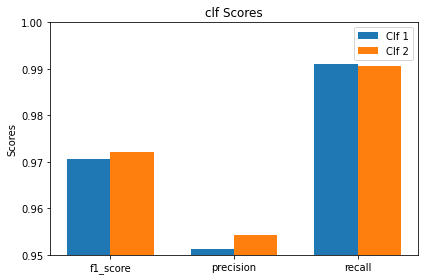

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['f1_score', 'precision', 'recall']
res1_scores = [res1['f1_score'], res1['precision'], res1['recall']]
res3_scores = [res3['f1_score'], res3['precision'], res3['recall']]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, res1_scores, width, label='Clf 1')
rects2 = ax.bar(x + width/2, res3_scores, width, label='Clf 2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_ylim(0.95,1)
ax.set_title('clf Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

**Question 3:**  Select a different reviews dataset and create a sentiment classifier which utilizes word embeddings (25pt).
Evaluate this classifier (5pt). Try to improve your classifier by adding additional features (20pt)

In [1]:
!mkdir ./datasets/hotel-review

# download the dataset from Kaggle and unzip it
!kaggle datasets download anu0012/hotel-review -p ./datasets/hotel-review
!unzip ./datasets/hotel-review/*.zip  -d ./datasets/hotel-review/

mkdir: cannot create directory ‘./datasets/hotel-review’: File exists
hotel-review.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./datasets/hotel-review/hotel-review.zip
replace ./datasets/hotel-review/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [1]:
import turicreate as tc

In [2]:
h_sf = tc.SFrame.read_csv("./datasets/hotel-review/train.csv")
h_sf['words_1grams'] = tc.text_analytics.count_ngrams(h_sf['Description'], n=1, method='word')
h_sf['words_1grams'] = h_sf['words_1grams'].dict_trim_by_keys(tc.text_analytics.stop_words(lang='en'), exclude=True)
h_sf['words_2grams'] = tc.text_analytics.count_ngrams(h_sf['Description'], n=2, method='word')
h_sf['tf_idf'] = tc.text_analytics.tf_idf(h_sf['Description'])
h_sf = h_sf.rename({"Is_Response": 'sentiment'})
h_sf = h_sf[h_sf['sentiment'].apply(lambda s: s=='happy' or s=='not happy')]

Finished parsing file /content/datasets/hotel-review/train.csv

Parsing completed. Parsed 100 lines in 0.937582 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/datasets/hotel-review/train.csv

Parsing completed. Parsed 38932 lines in 0.722066 secs.

In [3]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [4]:
from tqdm import tqdm
l = []
for i in tqdm(range(len(h_sf))):
    text = h_sf[i]['Description']
    l.append(nlp(text).vector)
h_sf['vector'] = l 
h_sf

100%|██████████| 38932/38932 [46:11<00:00, 14.05it/s]


User_ID,Description,Browser_Used,Device_Used,sentiment,words_1grams
id10326,The room was kind ofclean but had a VERY ...,Edge,Mobile,not happy,"{'breakfast': 1, 'price':1, 'staying': 1, 'fus ..."
id10327,I stayed at the CrownPlaza April -- - April ...,Internet Explorer,Mobile,not happy,"{'vacation': 1,'business': 1, 'stay' ..."
id10328,I booked this hotelthrough Hotwire at the ...,Mozilla,Tablet,not happy,"{'station': 2,'mcpherson': 1, 'view': ..."
id10329,Stayed here with husbandand sons on the way t ...,InternetExplorer,Desktop,happy,"{'beds': 1, 'heavenly':2, 'forgot': 1, 'walk': ..."
id10330,My girlfriends and Istayed here to celebrate ...,Edge,Tablet,not happy,"{'recommend': 1,'seaons': 1, 'stay': 1, ..."
id10331,We had - rooms. One wasvery nice and clearly ...,InternetExplorer,Desktop,happy,"{'stay': 1, 'vacation':1, 'good': 1, 'floors': ..."
id10332,My husband and I havestayed in this hotel a ...,Firefox,Tablet,not happy,"{'stay': 1, 'breakfast':1, 'internet': 1, ..."
id10333,My wife & I stayed inthis glorious city a ...,Google Chrome,Mobile,happy,"{'charm': 1, 'helpful':2, 'day': 1, 'small': 1, ..."
id10334,My boyfriend and I stayedat the Fairmont on a ...,Internet Explorer,Desktop,happy,"{'bowl': 1, 'strong': 1,'scorpion': 1, ..."
id10335,"Wonderful staff, greatlocation, but it was ...",Chrome,Tablet,not happy,"{'shampoo': 1, 'line': 1,'ginger': 1, 'white': 1, ..."


In [5]:
train, test = h_sf.random_split(0.8)

In [6]:
cls = tc.classifier.create(train,features=['vector'], target="sentiment")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: LogisticClassifier, SVMClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Logistic regression:

--------------------------------------------------------

Number of examples          : 29546

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 300

Number of coefficients      : 301

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 12.659676    | 0.872335          | 0.859254            |

| 2         | 3        | 18.776122    | 0.879815          | 0.870823            |

| 3         | 4        | 24.789459    | 0.881811          | 0.870823            |

| 4         | 5        | 30.978780    | 0.881439          | 0.871465            |

| 5         | 6        | 37.297394    | 0.881811          | 0.870823            |

| 6         | 7        | 43.441578    | 0.881811          | 0.870823            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

SVM:

--------------------------------------------------------

Number of examples          : 29546

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 300

Number of coefficients    : 301

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.051231  | 1.861500     | 0.683070          | 0.674807            |

| 1         | 9        | 1.075857  | 3.627929     | 0.685710          | 0.676735            |

| 2         | 14       | 0.062351  | 5.808495     | 0.686150          | 0.676735            |

| 3         | 15       | 0.077939  | 6.498773     | 0.686117          | 0.676735            |

| 4         | 19       | 1.636716  | 8.271503     | 0.685169          | 0.676735            |

| 9         | 32       | 4.258772  | 14.649097    | 0.819536          | 0.800771            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: LogisticClassifier              : 0.8708226221079691
PROGRESS: SVMClassifier                   : 0.800771208226221
PROGRESS: ---------------------------------------------
PROGRESS: Selecting LogisticClassifier based on validation set performance.


In [7]:
cls.evaluate(test)

{'accuracy': 0.8684546615581098,
 'auc': 0.9255626890856105,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |    happy     |    not happy    |  427  |
 |    happy     |      happy      |  4862 |
 |  not happy   |      happy      |  603  |
 |  not happy   |    not happy    |  1938 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.7900529963310232,
 'log_loss': 0.32152548800287983,
 'precision': 0.8194503171247357,
 'recall': 0.7626918536009445,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+--------------------+------+------+
 | threshold |        fpr         |        tpr         |  p   |  n   |
 +-----------+--------------------+--------------------+------+------+
 |    0.0   

In [8]:
cls = tc.classifier.create(train,features=['words_1grams', 'words_2grams', 'tf_idf', 'vector'], target="sentiment")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: LogisticClassifier, SVMClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Logistic regression:

--------------------------------------------------------

Number of examples          : 29546

Number of classes           : 2

Number of feature columns   : 4

Number of unpacked features : 844414

Number of coefficients      : 844415

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.059639  | 5.040207     | 0.698606          | 0.658740            |

| 1         | 9        | 1.252428  | 9.428817     | 0.887159          | 0.746144            |

| 2         | 10       | 1.252428  | 11.012696    | 0.960536          | 0.825193            |

| 3         | 11       | 1.252428  | 12.608511    | 0.982874          | 0.855398            |

| 4         | 12       | 1.252428  | 14.245473    | 0.994652          | 0.873393            |

| 9         | 19       | 1.252428  | 24.345821    | 0.999966          | 0.870180            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 29546

Number of classes           : 2

Number of feature columns   : 4

Number of unpacked features : 844414

Number of coefficients    : 844415

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 6        | 0.022991  | 4.886728     | 0.698606          | 0.658740            |

| 1         | 11       | 1.954274  | 9.466127     | 0.941549          | 0.830977            |

| 2         | 12       | 1.954274  | 10.891253    | 0.982163          | 0.872108            |

| 3         | 13       | 1.954274  | 12.340687    | 0.990794          | 0.881105            |

| 4         | 14       | 1.954274  | 13.779861    | 0.996074          | 0.886247            |

| 9         | 20       | 1.758405  | 21.876213    | 0.999898          | 0.865681            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: LogisticClassifier              : 0.8701799485861182
PROGRESS: SVMClassifier                   : 0.865681233933162
PROGRESS: ---------------------------------------------
PROGRESS: Selecting LogisticClassifier based on validation set performance.


In [9]:
cls.evaluate(test)

{'accuracy': 0.8739463601532567,
 'auc': 0.9348949119484873,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |    happy     |    not happy    |  301  |
 |    happy     |      happy      |  4988 |
 |  not happy   |      happy      |  686  |
 |  not happy   |    not happy    |  1855 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.789865871833085,
 'log_loss': 0.3817006309072253,
 'precision': 0.8603896103896104,
 'recall': 0.7300275482093664,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+--------------------+------+------+
 | threshold |        fpr         |        tpr         |  p   |  n   |
 +-----------+--------------------+--------------------+------+------+
 |    0.0    |